# Decision Tree 🌳

Decision Trees are **supervised learning algorithms** that create a model to predict target values by learning simple decision rules from data features.  
They work by **recursively splitting** the data based on feature values to form a tree-like structure.

---

## Splitting Criteria 📏

The **splitting criterion** determines the best feature to split the data on.

---

### **Gini Impurity**

- Measures how "impure" or mixed the classes are in a node  
- **Formula:**  
  Gini = 1 - Σ(probability(i))²
- Where pi is the probability of class i  
- **Range:** 0 (pure) → 0.5 (maximum impurity for binary classification)  
- **Lower Gini** → better split ✅

---

### **Entropy**

- Measures the amount of information or disorder in a node  
- **Formula:**  
 Entropy = 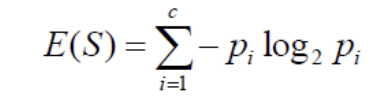
- **Range:**  0 (pure) to log2(n) where n is number of classes
- **Lower entropy** → more organized/pure 🔍

---

### **Information Gain**

- Measures the **reduction in entropy** after a split  
- **Formula:**  
  Entropy(parent) - Weighted_Average(Entropy(children))  
- Higher Information Gain → better split 📈  
- Uses **entropy** as the base measure

---

## When to Use Each? 🤔

- **Gini:** Faster computation, good default choice ⚡  
- **Entropy / Information Gain:** More mathematically precise, better for feature selection 🎯

---

## Algorithm of Decision Tree 🛠️

1. Start with the entire dataset at the root node 🌱  
2. For each feature and possible threshold, calculate the splitting criterion  
3. Choose the best split (lowest Gini / highest Information Gain)  
4. Split the data and create child nodes  
5. Repeat recursively until stopping criteria are met  
6. Assign class labels to the leaf nodes 🍂  

---


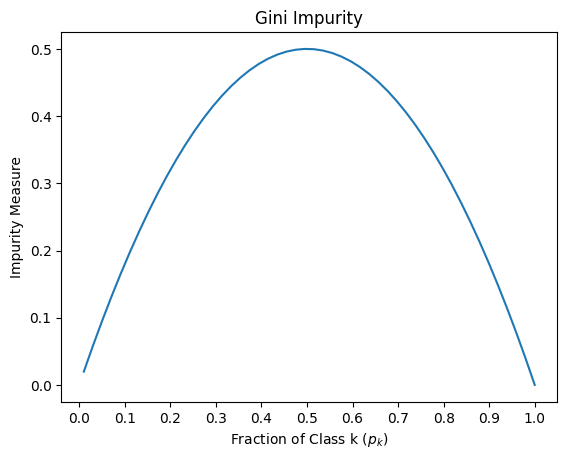

In [31]:
# Gini Impurity 
## Visualizing Gini Impurity range
plt.figure()
x = np.linspace(0.01,1)
y = 1 - (x*x) - (1-x)*(1-x) 
plt.plot(x,y)
plt.title('Gini Impurity')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Impurity Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()


In [32]:
# Computation of Gini Impurity for a simple dataset
# Defining a simple dataset
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

# STEP 2: 
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

# STEP 3: 
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)


           age  income student credit_rate default
0        youth    high      no        fair      no
1        youth    high      no   excellent      no
2   middle_age    high      no        fair     yes
3       senior  medium      no        fair     yes
4       senior     low     yes        fair     yes
5       senior     low     yes   excellent      no
6   middle_age     low     yes   excellent     yes
7        youth  medium      no        fair      no
8        youth     low     yes        fair     yes
9       senior  medium     yes        fair     yes
10       youth  medium     yes   excellent     yes
11  middle_age  medium      no   excellent     yes
12  middle_age    high     yes        fair     yes
13      senior  medium      no   excellent      no
Number of samples in each class is:
default
yes    9
no     5
Name: count, dtype: int64

Gini Impurity of the class is 0.459
Gini for age is 0.343
Gini for income is 0.440
Gini for student is 0.367
Gini for credit_rate is 0.429
The min

# k-Nearest Neighbors (k-NN) 🤖

k-NN is a **lazy learning algorithm** that classifies data points based on the class of their *k* nearest neighbors.  
It makes **no assumptions** about the data distribution 📊.

---

## Distance Metrics 📏

The **distance metric** determines how the algorithm measures proximity between data points.  
It directly impacts model accuracy and performance (used to find these nearest neighbors).

**Common distance metrics:**

1. **Euclidean Distance**
2. **Manhattan Distance**
3. **Minkowski Distance**
4. **Chebyshev Distance**
5. **Cosine Similarity**

---

### 1️⃣ Euclidean Distance

- **Formula:**  
  d = √(Σ(xi - yi)²)
- Most commonly used ✅  
- Works well for continuous features  
- Sensitive to scale — **always normalize features** ⚠️  
- Good for: Most general cases, circular decision boundaries

**When to use:**
- Continuous numerical data
- Well-scaled features

**Use Case Examples:**
- 🏠 Predicting house prices based on square footage and bedrooms.
- Image recognition where pixel values are continuous.

---

### 2️⃣ Manhattan Distance (L1)

- **Formula:**  
  d = Σ|xi - yi|
- Also known as **taxicab** or **city block distance** 🚕  
- Measures distance traveled along a grid-like path  
- Less sensitive to outliers than Euclidean  
- Good for: High-dimensional data, grid-like patterns

**When to use:**
- Data with features arranged on a grid
- When robustness to outliers is needed 💪

**Use Case Examples:**
- Delivery routing for trucks in a city grid.
- Robot navigation restricted to vertical/horizontal moves.
- Infrastructure planning in transportation networks.

---
## In short
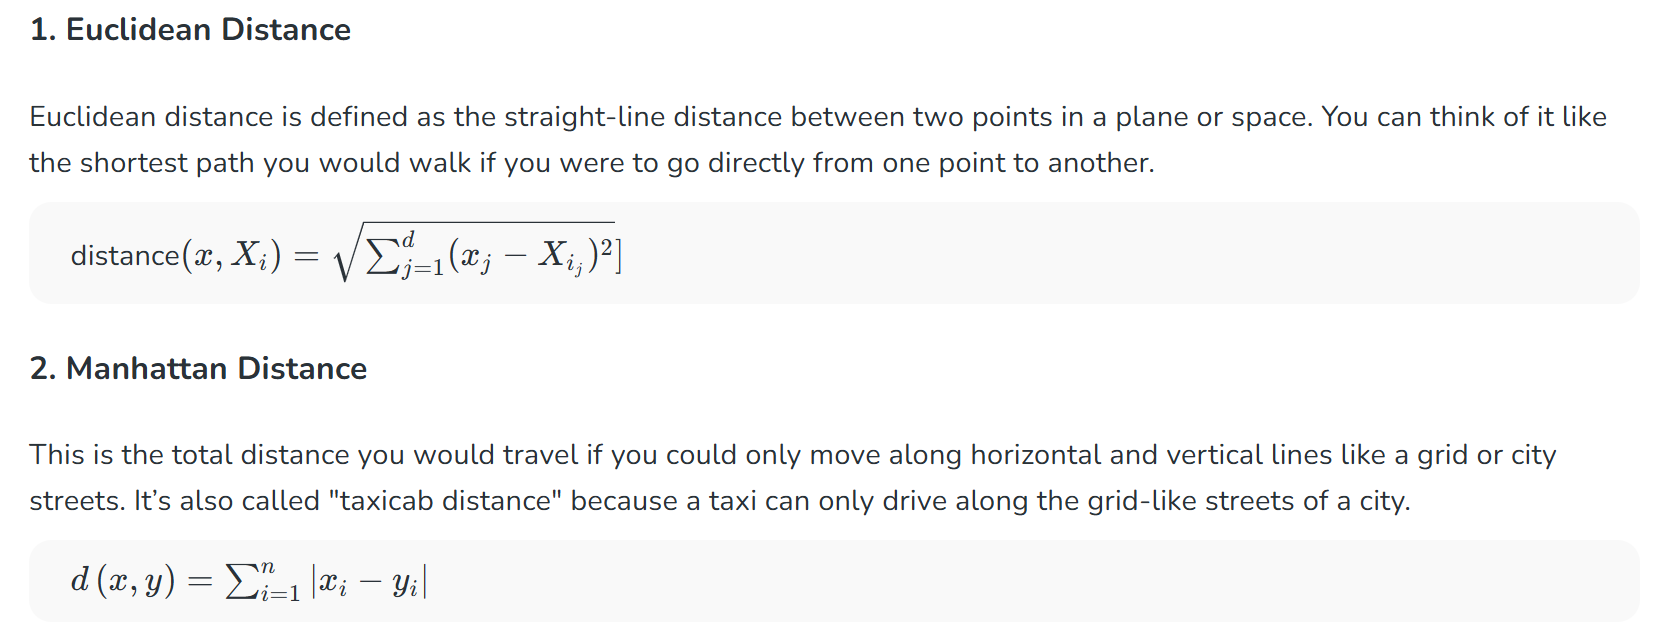

---
## Choosing the value of *k* 🔍

- **Small k** → Sensitive to noise (overfitting) ⚠️  
- **Large k** → Loses local patterns (underfitting)  
- **Rule of thumb:**  
  \[
  k \approx \sqrt{n}
  \]  
  Use **odd numbers** for binary classification ⚖️  
- **Best practice:** Use **cross-validation** to choose k.

---

## k-NN Algorithm Steps 🛠️

1. Store all training data (**lazy learning**)  
2. For a new point:  
    - Calculate distance to **all** training points  
3. Find the **k nearest neighbors**  
4. **Classification:** Choose the most common class 🗳️  
5. **Regression:** Take the average value 📊  

---


## Code for Python Implementation of KNN Algorithm:

In [34]:
# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2)) ** 2))

In [35]:
# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2)) ** 2))

# Simple KNN function
def knn_predict(train_data, train_labels, test_point, k):
    distances = []
    for data, label in zip(train_data, train_labels):
        dist = euclidean_distance(test_point, data)
        distances.append((dist, label))
    distances.sort(key=lambda x: x[0])  # Sort by distance
    k_nearest = [label for _, label in distances[:k]]
    return Counter(k_nearest).most_common(1)[0][0]

- Converts the two points into NumPy arrays.
- Subtracts them → gets the difference in each feature.
- Squares the differences → `(difference) ** 2`.
- Adds them → `np.sum(...)`.
- Takes the square root → `np.sqrt(...)`.
- **Result** = Straight-line distance between the two points.
- Loop through each training point.
- Find its distance to the test point.
- Store `(distance, label)` in a list.
- Sort the list so the nearest points come first.
- Take the first `k` labels (closest points).
- Find which label appears the most — **that becomes the prediction**.

In [36]:
# Training data & labels
train_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
train_labels = ['A', 'A', 'A', 'B', 'B']

- Each list inside `train_data` is a point `(x, y)` — two features.
- `train_labels` stores the class for each point (`A` or `B`).

In [37]:
# Test point
test_point = [4, 5]
k = 3

- This is the **point we want to classify**.
- `k=3` means we look at the **3 nearest neighbors**

In [38]:
# Prediction
predicted_class = knn_predict(train_data, train_labels, test_point, k)
print(f"Test Point: {test_point}, Predicted Class: {predicted_class}")

Test Point: [4, 5], Predicted Class: A


- Runs the KNN function.
- Prints the **predicted class** for `[4, 5]`.

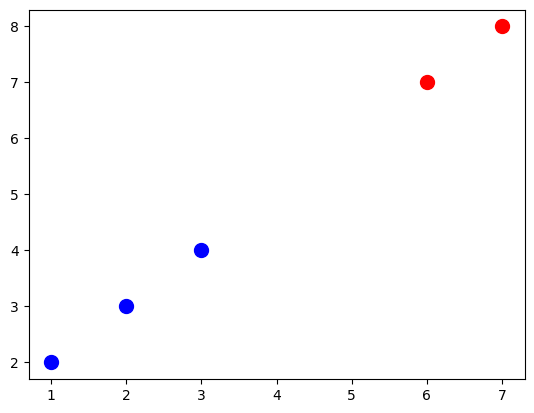

In [39]:
# Plot the data
for data, label in zip(train_data, train_labels):
    color = 'blue' if label == 'A' else 'red'
    plt.scatter(data[0], data[1], color=color, s=100, label=f"Class {label}" if f"Class {label}" 
                not in plt.gca().get_legend_handles_labels()[1] else "")

- Loops through each point.
- If label is `'A'` → blue; `'B'` → red.
- Uses `label=...` but only adds it once to the legend.

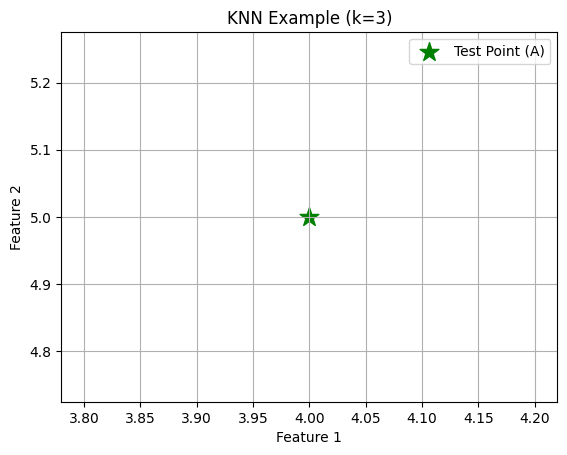

In [40]:
# Plot the test point
plt.scatter(test_point[0], test_point[1], color='green', marker='*', s=200, label=f"Test Point ({predicted_class})")

plt.title("KNN Example (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


- Plots the **test point** as a big green star ⭐.
- Label shows the predicted class.
- Adds title, axis labels, legend, and grid.
- `plt.show()` displays the plot.

# Implement KNN from scratch in Python.

- **Imports** numpy for calculations.

- **Defines a KNN class** with methods to fit data, compute Euclidean distance, and predict labels.

- **Generates** synthetic 2D classification data.

- **Splits data** into train and test sets.

- **Creates** a KNN classifier (k=2) and fits it on training data.

- **Predicts** labels for the test set.

- **Prints** predicted vs actual classes.

In [42]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [44]:
# Using the KNN Algorithm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples = 50,
                                       n_features = 2,
                                       n_informative = 2,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [0.51, .49])
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

# Create a KNN classifier with k=2
knn = KNN(k=2)
knn.fit(X_train, y_train)

# Predict a new data point
X_new = np.array([[5.5, 3.5]])
prediction = knn.predict(X_test)

print("Predicted class:", prediction)
print("Actual class:", y_test)

Predicted class: [0 0 1 0 0 0 1 0 1 1 1 1 1]
Actual class: [0 1 1 0 1 0 1 1 1 1 1 1 1]


# Visualize decision boundaries

- **Imports** numpy, matplotlib, and sklearn libraries.

- **Generates** a synthetic 2D classification dataset with 100 samples and 2 classes.

- **Splits** the dataset into training (75%) and testing (25%) sets.

- **Creates** and trains a Random Forest classifier with 100 trees on the training data.

- **Creates** a mesh grid covering the feature space to visualize decision boundaries.

- **Predicts** the class for each point in the grid.

- **Plots** the decision boundaries with contourf and overlays the original data points, coloring them by class.

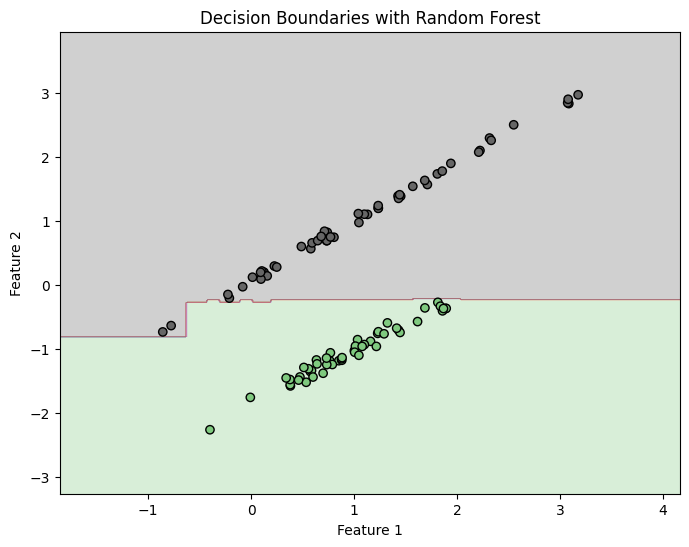

In [47]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#  Generating synthetic dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,       # 2 features for 2D visualization
    n_informative=2,    # number of informative features
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42
)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=42
)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Create mesh grid for plotting

h = 0.02  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predicting for each point in grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Ploting decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Accent)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Accent)
plt.title("Decision Boundaries with Random Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Train a DecisionTreeClassifier on Iris dataset

- **Imports** necessary libraries for dataset loading, decision tree modeling, and plotting.

- **Loads** the Iris dataset into features X and labels y.

- **Creates and trains** a Decision Tree using Gini Impurity (clf_gini).

- **Creates and trains** a Decision Tree using Entropy (clf_entropy).

- **Plots** the Gini-based tree to visualize splits, features, and predicted classes.

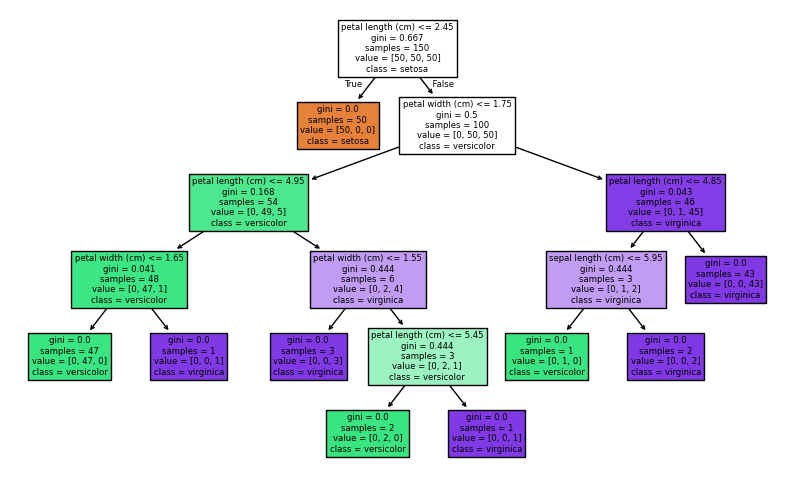

In [49]:
# Splitting Criteria
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load sample data
data = load_iris()
X, y = data.data, data.target

# Decision Tree using Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X, y)

# Decision Tree using Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X, y)

# Plot tree (Gini example)
plt.figure(figsize=(10, 6))
plot_tree(clf_gini, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()
